# Iris Dataset: Foundational Data Analysis 


**Introduction**

The Iris dataset was used in R.A. Fisher's classic 1936 paper,The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id

SepalLengthCm 

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

In [36]:
# import modules
import pandas as pd
import seaborn as sns
import numpy as np

import itertools

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


In [37]:
#import data set
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
iris_df = pd.DataFrame(iris)
print(" Shape of the dataframe: ",iris_df.shape,";\n","Describe dataframe: \n",iris_df.info)

 Shape of the dataframe:  (150, 5) ;
 Describe dataframe: 
 <bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


In [28]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [30]:
iris_df.duplicated().sum()

np.int64(1)

In [ ]:
iris_df[iris_df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [33]:
iris_df = iris_df.drop_duplicates()

In [34]:
iris_df.duplicated().sum()

np.int64(0)

In [24]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#single factor analysis
numeric_features = iris_df.select_dtypes(include=['float64', 'int64']).columns


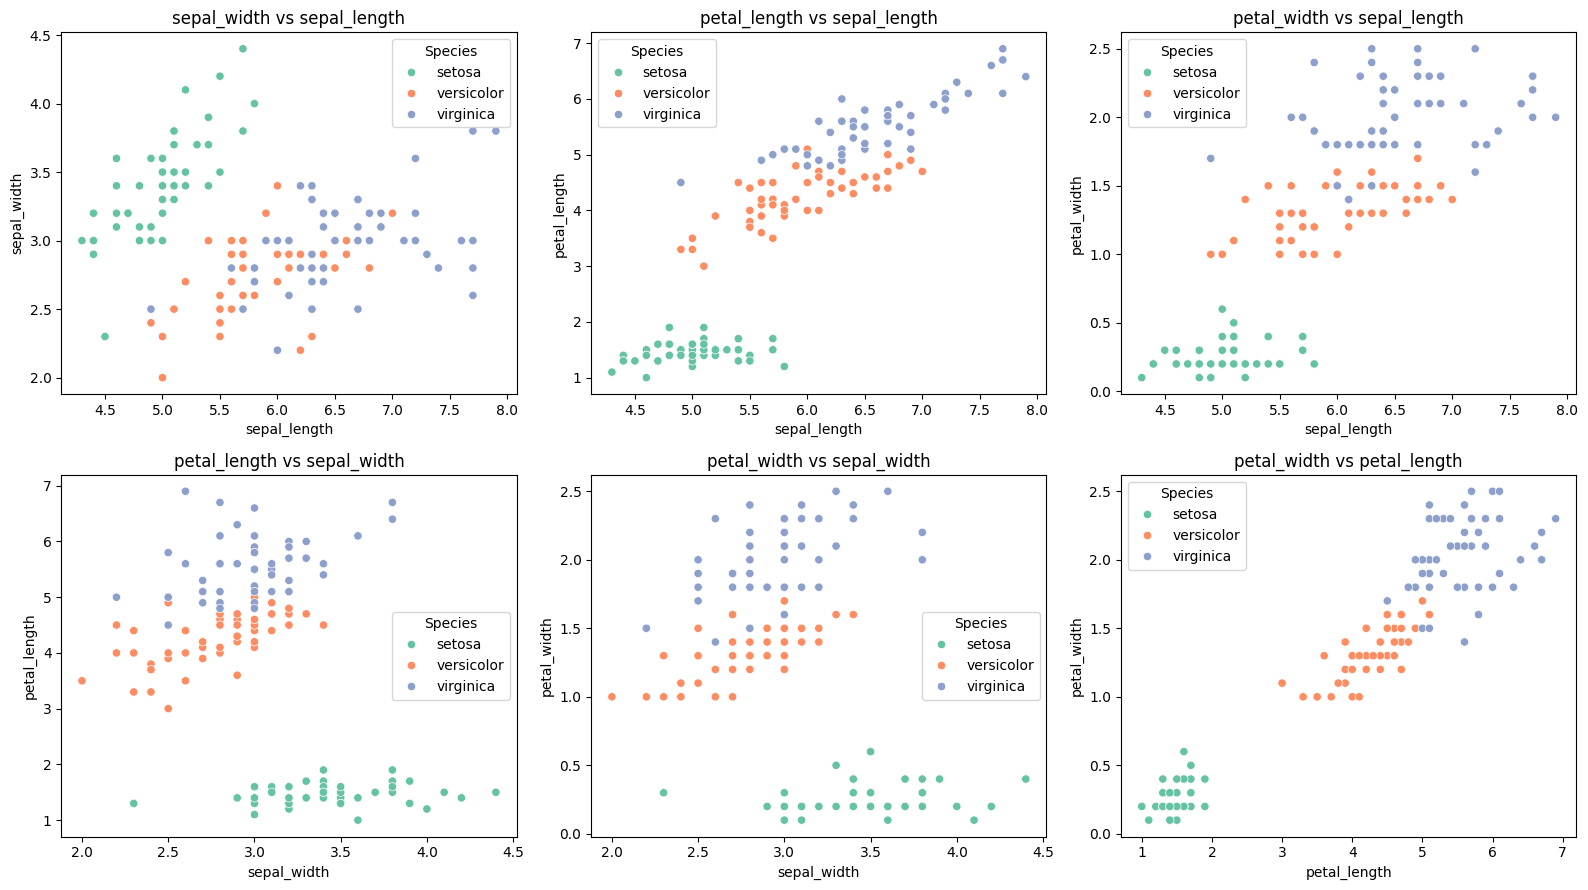

In [ ]:
#correlation visualzation
iris_df = iris_df.drop_duplicates()

# Feature pairs to plot
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pairs = list(itertools.combinations(features, 2))  # all unique 2-feature combinations

# Set up 3x2 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

# Create each subplot
for i, (x_feat, y_feat) in enumerate(pairs):
    sns.scatterplot(data=iris, x=x_feat, y=y_feat, hue='species', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{y_feat} vs {x_feat}')
    axes[i].legend().set_title('Species')

# Remove unused subplot if any
if len(axes) > len(pairs):
    for j in range(len(pairs), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()
